<a href="https://colab.research.google.com/github/Best-Verie/Air_Quality_Classification_SA/blob/main/Air_Quality_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive (uncomment if using Colab)
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)



In [6]:
# Load dataset - UPDATE THIS PATH
df = pd.read_csv('/content/drive/MyDrive/Datasets/pollution_dataset.csv')


In [7]:
print("Dataset loaded!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())


Dataset loaded!
Shape: (5000, 10)

First few rows:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  

Column names:
['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality']

Data types:
Temperature                  


Target variable: Air Quality
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


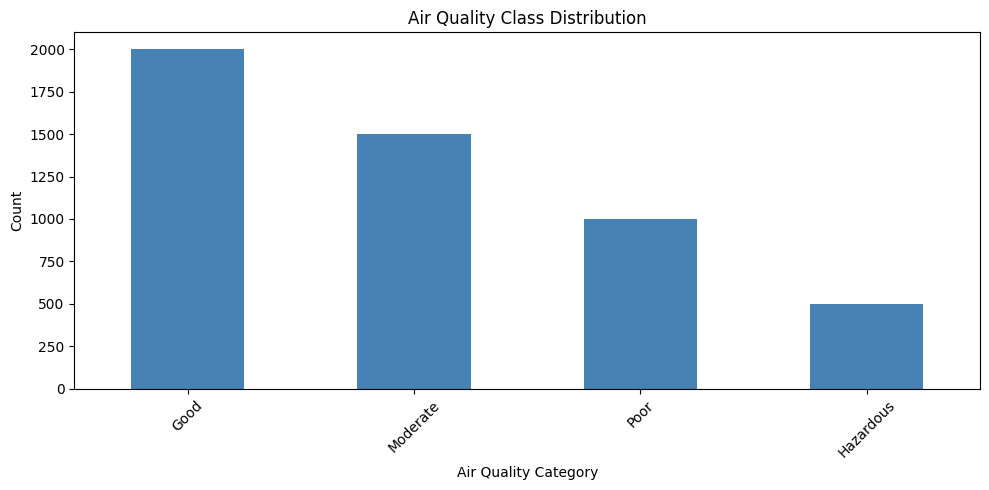


Handling missing values...

Classes: ['Good' 'Hazardous' 'Moderate' 'Poor']
Encoded as: [0 1 2 3]

Number of features: 9

Train: 3502 | Val: 748 | Test: 750
Preprocessing complete!


In [8]:
target_col = 'Air Quality'

print(f"\nTarget variable: {target_col}")
print(df[target_col].value_counts())

# Visualize target distribution
plt.figure(figsize=(10, 5))
df[target_col].value_counts().plot(kind='bar', color='steelblue')
plt.title('Air Quality Class Distribution')
plt.xlabel('Air Quality Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Handle missing values
print("\nHandling missing values...")
df = df.dropna()

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode target if categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

print(f"\nClasses: {class_names}")
print(f"Encoded as: {np.unique(y_encoded)}")

# Select only numerical features
X_numeric = X.select_dtypes(include=[np.number])
print(f"\nNumber of features: {X_numeric.shape[1]}")

# Split data: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_numeric, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)

print(f"\nTrain: {len(y_train)} | Val: {len(y_val)} | Test: {len(y_test)}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete!")


In [9]:
results_ml = []

# Experiment 1: Logistic Regression
print("\n=== Experiment 1: Logistic Regression ===")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
train_acc = lr.score(X_train_scaled, y_train)
val_acc = lr.score(X_val_scaled, y_val)
test_acc = lr.score(X_test_scaled, y_test)
print(f"Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")
results_ml.append(['Logistic Regression', train_acc, val_acc, test_acc])

# Experiment 2: Random Forest
print("\n=== Experiment 2: Random Forest ===")
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
train_acc = rf.score(X_train_scaled, y_train)
val_acc = rf.score(X_val_scaled, y_val)
test_acc = rf.score(X_test_scaled, y_test)
print(f"Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")
results_ml.append(['Random Forest', train_acc, val_acc, test_acc])

# Experiment 3: SVM
print("\n=== Experiment 3: Support Vector Machine ===")
svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
train_acc = svm.score(X_train_scaled, y_train)
val_acc = svm.score(X_val_scaled, y_val)
test_acc = svm.score(X_test_scaled, y_test)
print(f"Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")
results_ml.append(['SVM (RBF)', train_acc, val_acc, test_acc])

# Experiment 4: K-Nearest Neighbors
print("\n=== Experiment 4: K-Nearest Neighbors ===")
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn.fit(X_train_scaled, y_train)
train_acc = knn.score(X_train_scaled, y_train)
val_acc = knn.score(X_val_scaled, y_val)
test_acc = knn.score(X_test_scaled, y_test)
print(f"Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")
results_ml.append(['KNN (k=7)', train_acc, val_acc, test_acc])

# Experiment 5: Gradient Boosting
print("\n=== Experiment 5: Gradient Boosting ===")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train_scaled, y_train)
train_acc = gb.score(X_train_scaled, y_train)
val_acc = gb.score(X_val_scaled, y_val)
test_acc = gb.score(X_test_scaled, y_test)
print(f"Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")
results_ml.append(['Gradient Boosting', train_acc, val_acc, test_acc])

# Display Traditional ML Results
ml_df = pd.DataFrame(results_ml, columns=['Model', 'Train Acc', 'Val Acc', 'Test Acc'])
print("\n=== TRADITIONAL ML RESULTS ===")
print(ml_df)



=== Experiment 1: Logistic Regression ===
Train: 0.9449 | Val: 0.9358 | Test: 0.9347

=== Experiment 2: Random Forest ===
Train: 0.9966 | Val: 0.9492 | Test: 0.9493

=== Experiment 3: Support Vector Machine ===
Train: 0.9774 | Val: 0.9412 | Test: 0.9360

=== Experiment 4: K-Nearest Neighbors ===
Train: 0.9415 | Val: 0.9184 | Test: 0.9213

=== Experiment 5: Gradient Boosting ===
Train: 1.0000 | Val: 0.9465 | Test: 0.9520

=== TRADITIONAL ML RESULTS ===
                 Model  Train Acc   Val Acc  Test Acc
0  Logistic Regression   0.944889  0.935829  0.934667
1        Random Forest   0.996573  0.949198  0.949333
2            SVM (RBF)   0.977441  0.941176  0.936000
3            KNN (k=7)   0.941462  0.918449  0.921333
4    Gradient Boosting   1.000000  0.946524  0.952000


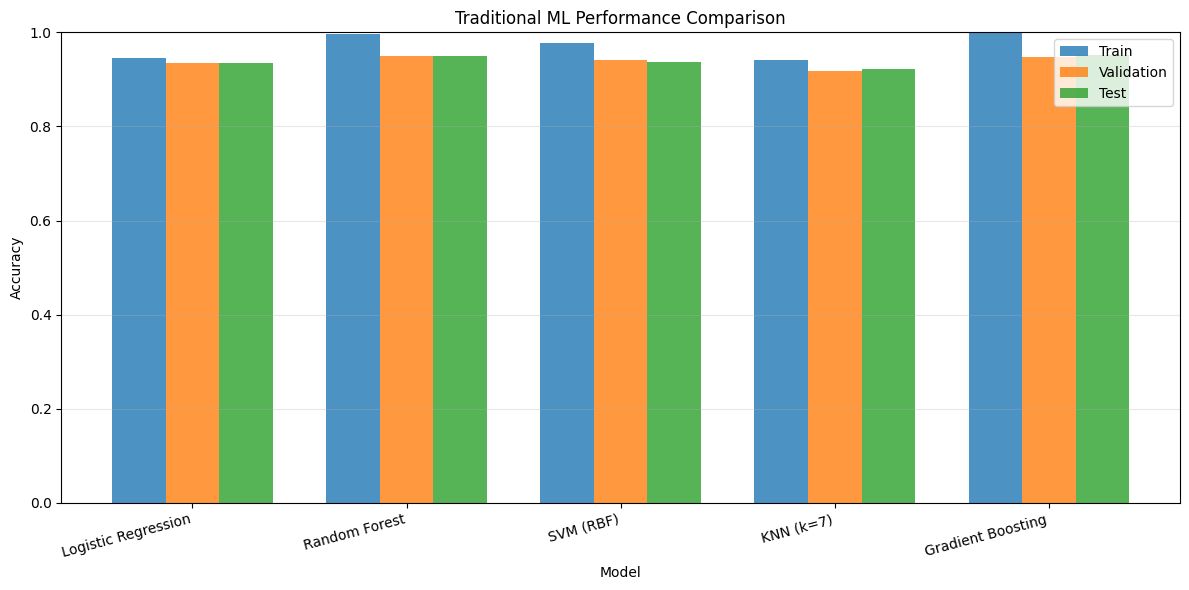

In [10]:
# Visualize ML results
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(ml_df))
width = 0.25
ax.bar(x - width, ml_df['Train Acc'], width, label='Train', alpha=0.8)
ax.bar(x, ml_df['Val Acc'], width, label='Validation', alpha=0.8)
ax.bar(x + width, ml_df['Test Acc'], width, label='Test', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Traditional ML Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(ml_df['Model'], rotation=15, ha='right')
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


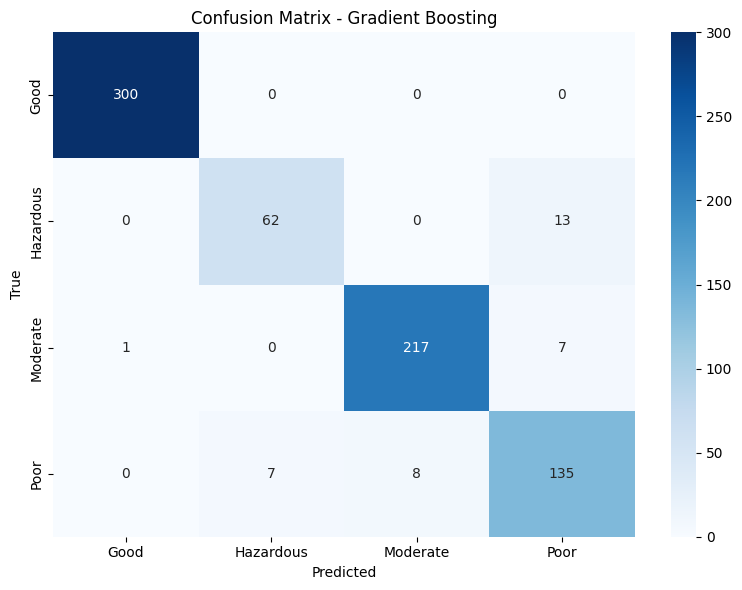


=== Classification Report - Gradient Boosting ===
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       300
   Hazardous       0.90      0.83      0.86        75
    Moderate       0.96      0.96      0.96       225
        Poor       0.87      0.90      0.89       150

    accuracy                           0.95       750
   macro avg       0.93      0.92      0.93       750
weighted avg       0.95      0.95      0.95       750



In [11]:
# Confusion Matrix - Best Traditional ML Model
best_ml_idx = ml_df['Test Acc'].idxmax()
best_ml = [lr, rf, svm, knn, gb][best_ml_idx]
y_pred_ml = best_ml.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_ml)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {ml_df.iloc[best_ml_idx]["Model"]}')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print(f"\n=== Classification Report - {ml_df.iloc[best_ml_idx]['Model']} ===")
print(classification_report(y_test, y_pred_ml, target_names=class_names))


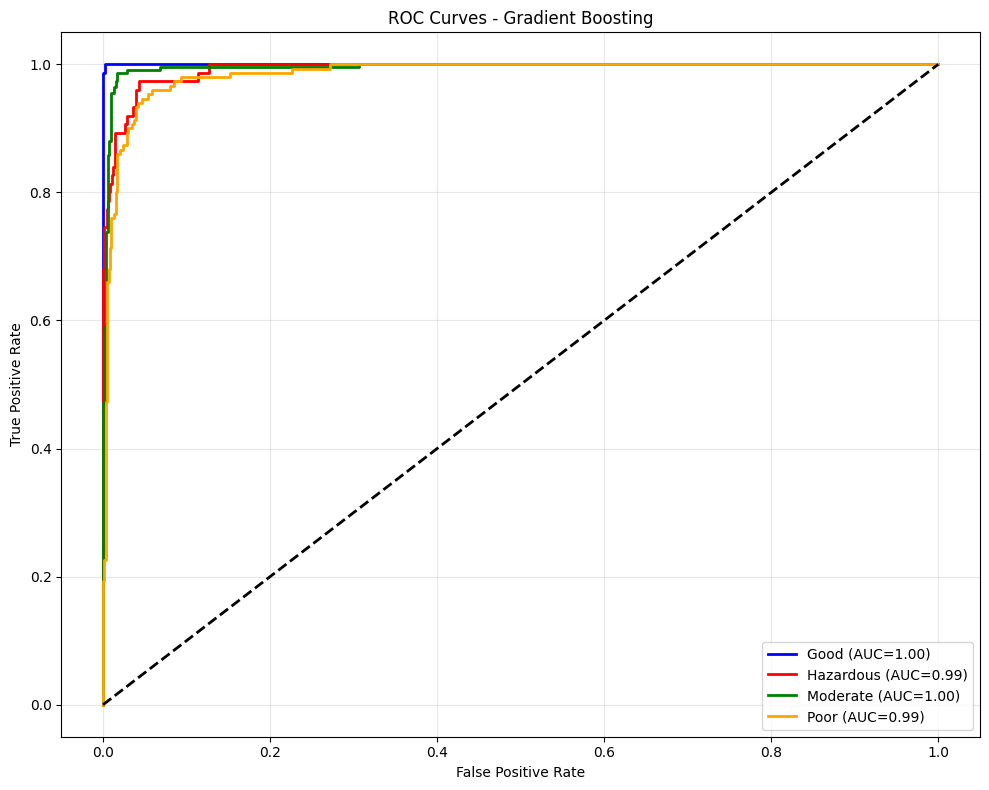

In [12]:
# ROC Curves - Traditional ML
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
y_score = best_ml.predict_proba(X_test_scaled)

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])

for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{class_names[i]} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves - {ml_df.iloc[best_ml_idx]["Model"]}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [13]:
n_features = X_train_scaled.shape[1]
n_classes = len(class_names)

results_dl = []
histories = []

# Callbacks for training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-7)
]

# Experiment 6: Simple Neural Network
print("\n=== Experiment 6: Simple Neural Network ===")
model1 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(n_features,)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation='softmax')
])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h1 = model1.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                epochs=100, batch_size=32, callbacks=callbacks, verbose=0)
_, test_acc = model1.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
results_dl.append(['Simple NN', h1.history['accuracy'][-1], h1.history['val_accuracy'][-1], test_acc])
histories.append(('Simple NN', h1))

# Experiment 7: Deep Neural Network
print("\n=== Experiment 7: Deep Neural Network ===")
model2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(n_features,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h2 = model2.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                epochs=100, batch_size=32, callbacks=callbacks, verbose=0)
_, test_acc = model2.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
results_dl.append(['Deep NN', h2.history['accuracy'][-1], h2.history['val_accuracy'][-1], test_acc])
histories.append(('Deep NN', h2))

# Experiment 8: NN with L2 Regularization
print("\n=== Experiment 8: NN + L2 Regularization ===")
model3 = models.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01),
                 input_shape=(n_features,)),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h3 = model3.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                epochs=100, batch_size=32, callbacks=callbacks, verbose=0)
_, test_acc = model3.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
results_dl.append(['NN + L2 Reg', h3.history['accuracy'][-1], h3.history['val_accuracy'][-1], test_acc])
histories.append(('NN + L2', h3))

# Experiment 9: NN with Different Optimizer (RMSprop)
print("\n=== Experiment 9: NN + RMSprop Optimizer ===")
model4 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(n_features,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation='softmax')
])
model4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h4 = model4.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                epochs=100, batch_size=32, callbacks=callbacks, verbose=0)
_, test_acc = model4.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
results_dl.append(['NN + RMSprop', h4.history['accuracy'][-1], h4.history['val_accuracy'][-1], test_acc])
histories.append(('NN + RMSprop', h4))

# Experiment 10: NN with Lower Learning Rate
print("\n=== Experiment 10: NN + Low Learning Rate ===")
model5 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(n_features,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_classes, activation='softmax')
])
model5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h5 = model5.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                epochs=100, batch_size=32, callbacks=callbacks, verbose=0)
_, test_acc = model5.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
results_dl.append(['NN + Low LR', h5.history['accuracy'][-1], h5.history['val_accuracy'][-1], test_acc])
histories.append(('NN + Low LR', h5))



=== Experiment 6: Simple Neural Network ===
Test Accuracy: 0.9493

=== Experiment 7: Deep Neural Network ===
Test Accuracy: 0.9547

=== Experiment 8: NN + L2 Regularization ===
Test Accuracy: 0.9360

=== Experiment 9: NN + RMSprop Optimizer ===
Test Accuracy: 0.9520

=== Experiment 10: NN + Low Learning Rate ===
Test Accuracy: 0.9480


In [14]:
# Display Deep Learning Results
dl_df = pd.DataFrame(results_dl, columns=['Model', 'Train Acc', 'Val Acc', 'Test Acc'])
print("\n=== DEEP LEARNING RESULTS ===")
print(dl_df)



=== DEEP LEARNING RESULTS ===
          Model  Train Acc   Val Acc  Test Acc
0     Simple NN   0.957453  0.943850  0.949333
1       Deep NN   0.945174  0.947861  0.954667
2   NN + L2 Reg   0.925471  0.934492  0.936000
3  NN + RMSprop   0.937179  0.951872  0.952000
4   NN + Low LR   0.918618  0.937166  0.948000


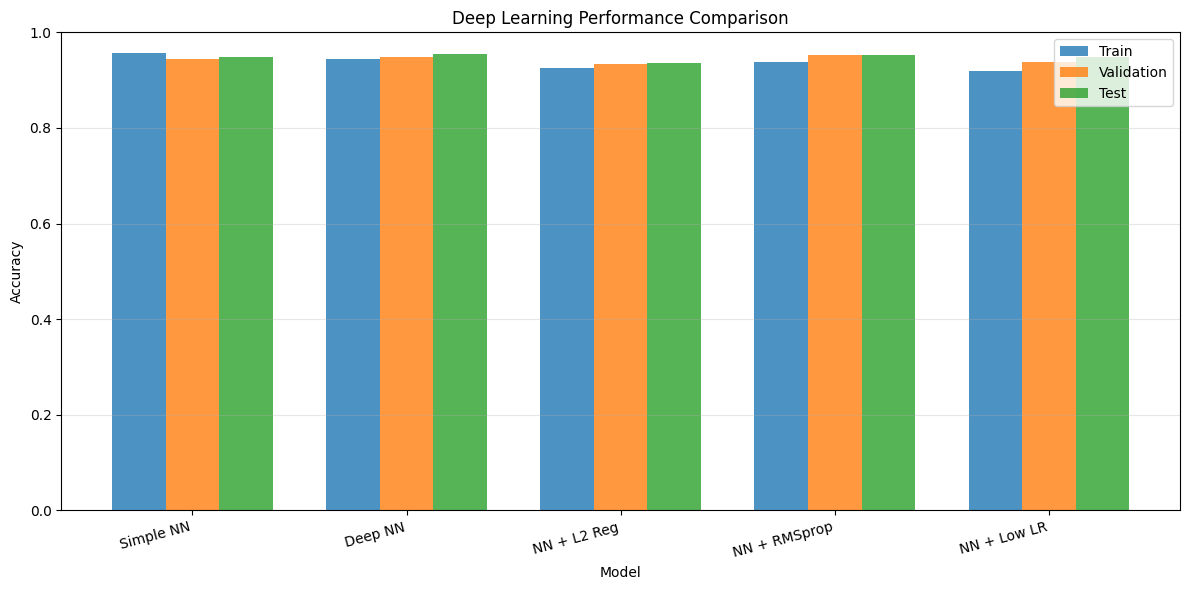

In [15]:
# Visualize DL results
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(dl_df))
width = 0.25
ax.bar(x - width, dl_df['Train Acc'], width, label='Train', alpha=0.8)
ax.bar(x, dl_df['Val Acc'], width, label='Validation', alpha=0.8)
ax.bar(x + width, dl_df['Test Acc'], width, label='Test', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Deep Learning Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(dl_df['Model'], rotation=15, ha='right')
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



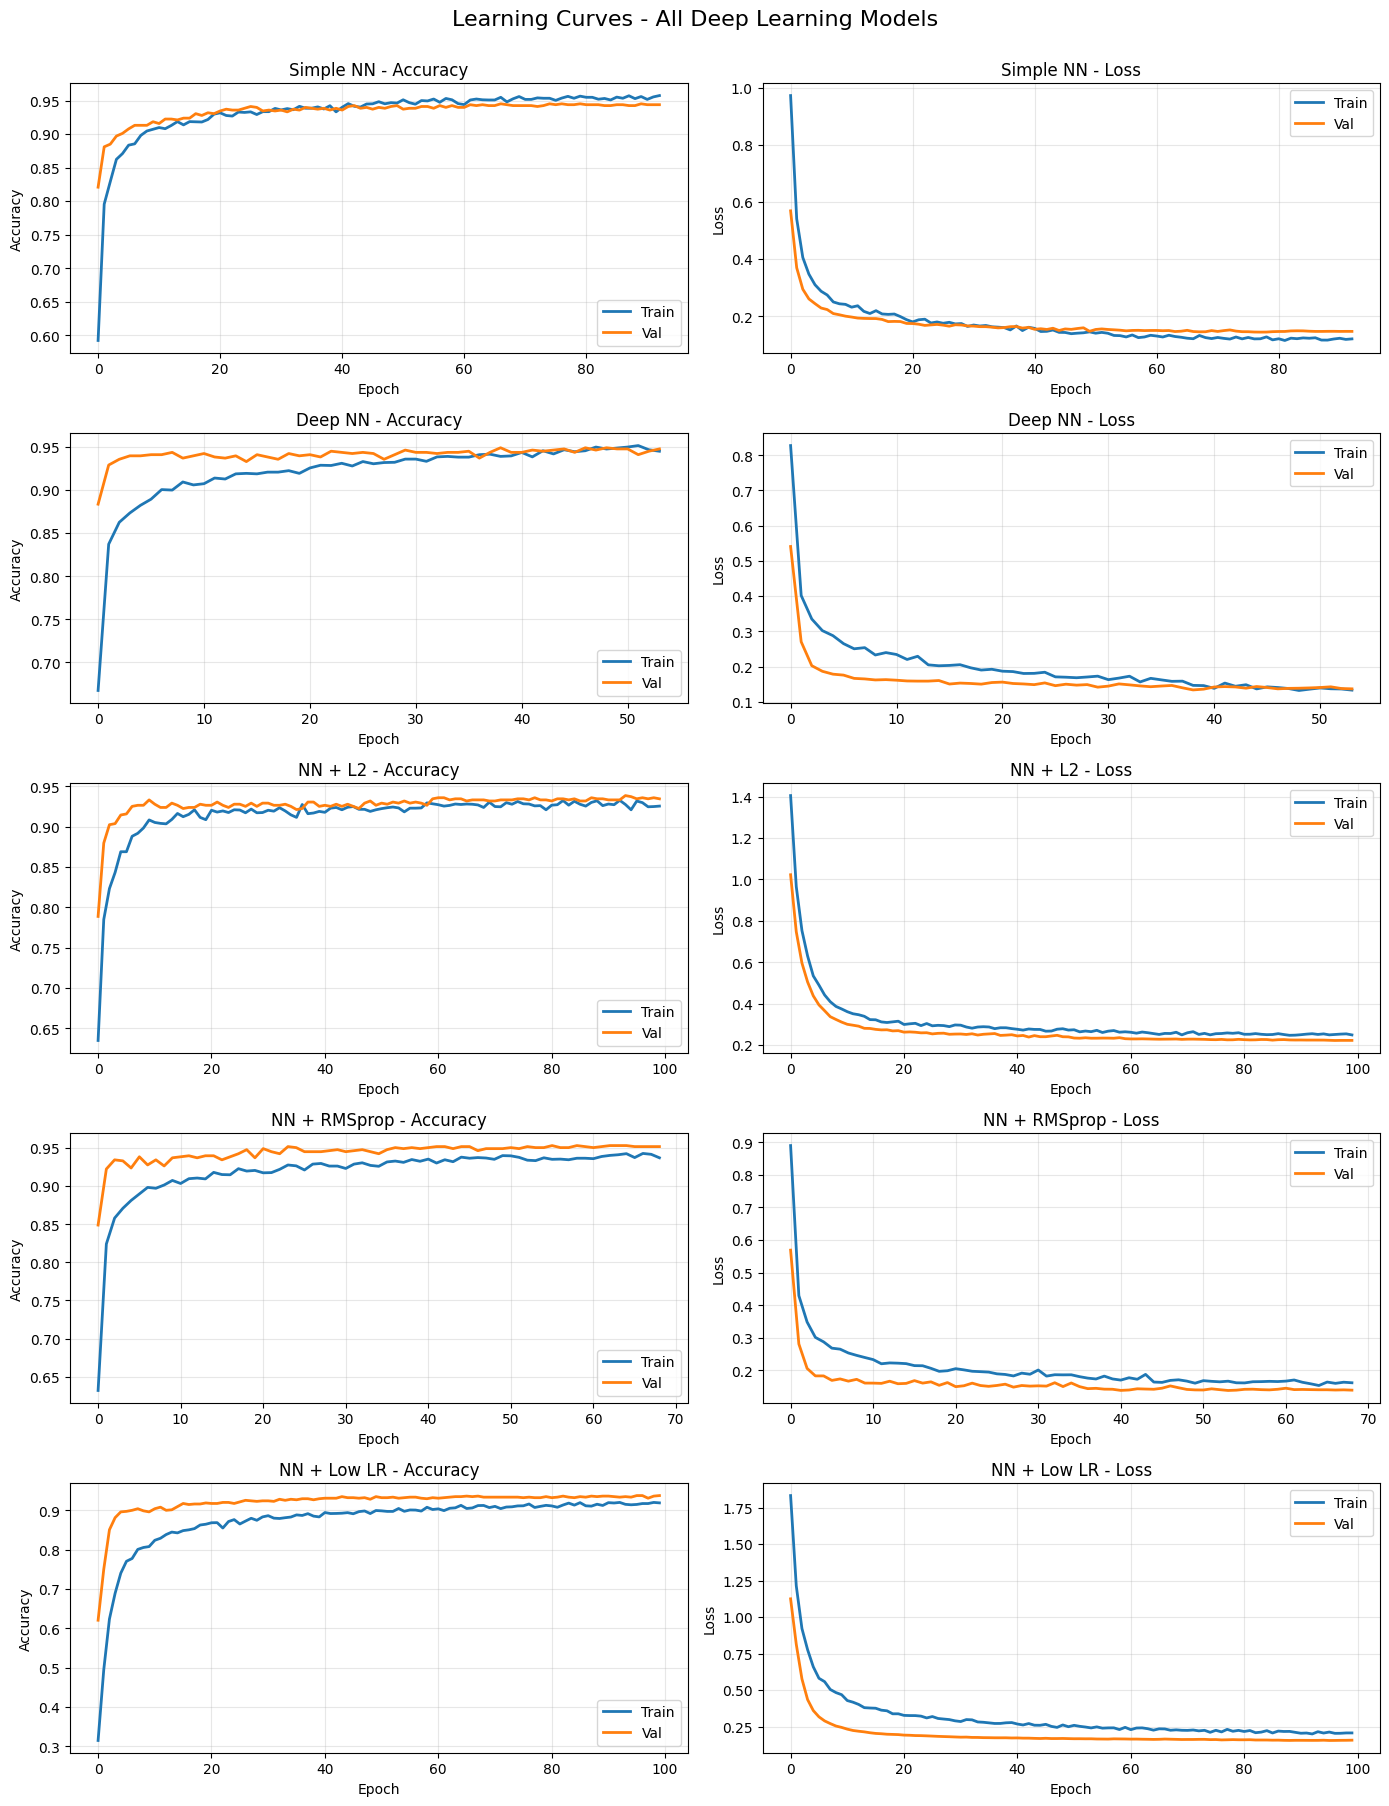

In [16]:
# LEARNING CURVES - All Deep Learning Models
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
for idx, (name, h) in enumerate(histories):
    # Accuracy
    axes[idx, 0].plot(h.history['accuracy'], label='Train', linewidth=2)
    axes[idx, 0].plot(h.history['val_accuracy'], label='Val', linewidth=2)
    axes[idx, 0].set_title(f'{name} - Accuracy')
    axes[idx, 0].set_xlabel('Epoch')
    axes[idx, 0].set_ylabel('Accuracy')
    axes[idx, 0].legend()
    axes[idx, 0].grid(alpha=0.3)

    # Loss
    axes[idx, 1].plot(h.history['loss'], label='Train', linewidth=2)
    axes[idx, 1].plot(h.history['val_loss'], label='Val', linewidth=2)
    axes[idx, 1].set_title(f'{name} - Loss')
    axes[idx, 1].set_xlabel('Epoch')
    axes[idx, 1].set_ylabel('Loss')
    axes[idx, 1].legend()
    axes[idx, 1].grid(alpha=0.3)

plt.suptitle('Learning Curves - All Deep Learning Models', fontsize=16, y=1.001)
plt.tight_layout()
plt.show()


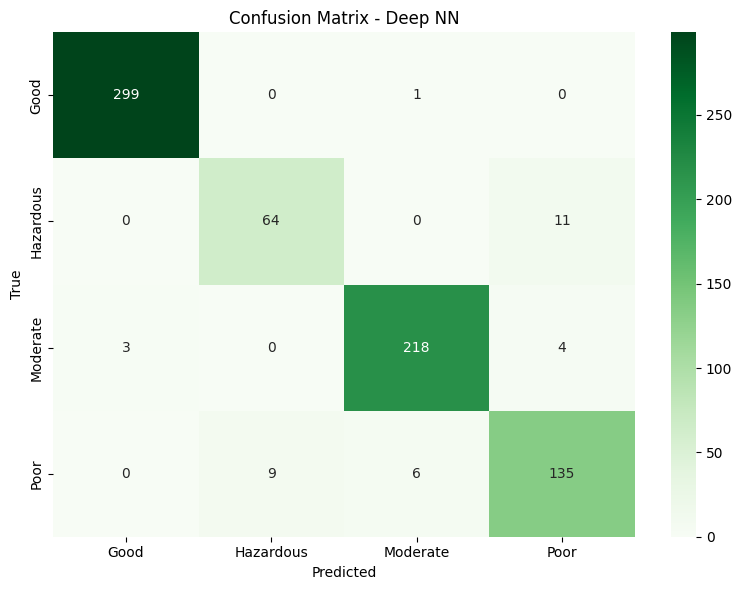

In [17]:
# Confusion Matrix - Best Deep Learning Model
best_dl_idx = dl_df['Test Acc'].idxmax()
best_dl = [model1, model2, model3, model4, model5][best_dl_idx]
y_pred_dl = np.argmax(best_dl.predict(X_test_scaled, verbose=0), axis=1)

cm = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {dl_df.iloc[best_dl_idx]["Model"]}')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


In [18]:
print(f"\n=== Classification Report - {dl_df.iloc[best_dl_idx]['Model']} ===")
print(classification_report(y_test, y_pred_dl, target_names=class_names))



=== Classification Report - Deep NN ===
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       300
   Hazardous       0.88      0.85      0.86        75
    Moderate       0.97      0.97      0.97       225
        Poor       0.90      0.90      0.90       150

    accuracy                           0.95       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.95      0.95      0.95       750



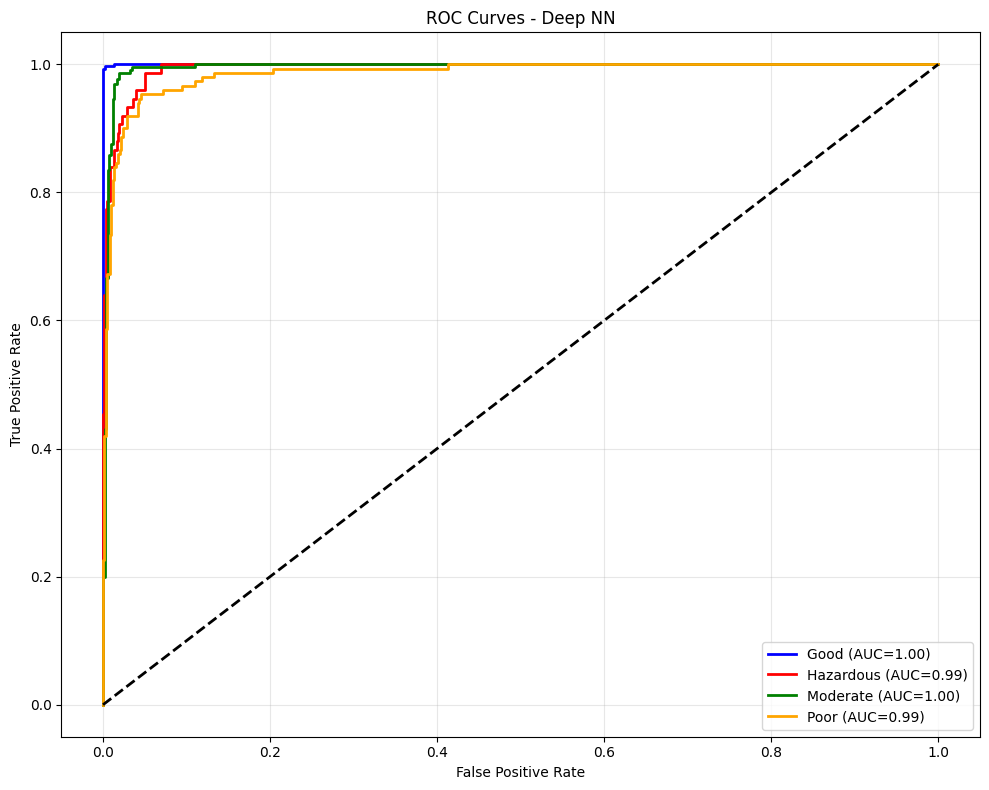

In [19]:
# ROC Curves - Deep Learning
y_pred_proba = best_dl.predict(X_test_scaled, verbose=0)

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])

for i, color in zip(range(len(class_names)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{class_names[i]} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves - {dl_df.iloc[best_dl_idx]["Model"]}')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




=== COMPLETE RESULTS TABLE ===
              Model  Train Acc  Val Acc  Test Acc           Type
Logistic Regression   0.944889 0.935829  0.934667 Traditional ML
      Random Forest   0.996573 0.949198  0.949333 Traditional ML
          SVM (RBF)   0.977441 0.941176  0.936000 Traditional ML
          KNN (k=7)   0.941462 0.918449  0.921333 Traditional ML
  Gradient Boosting   1.000000 0.946524  0.952000 Traditional ML
          Simple NN   0.957453 0.943850  0.949333  Deep Learning
            Deep NN   0.945174 0.947861  0.954667  Deep Learning
        NN + L2 Reg   0.925471 0.934492  0.936000  Deep Learning
       NN + RMSprop   0.937179 0.951872  0.952000  Deep Learning
        NN + Low LR   0.918618 0.937166  0.948000  Deep Learning

 Results saved to 'experiment_results.csv'


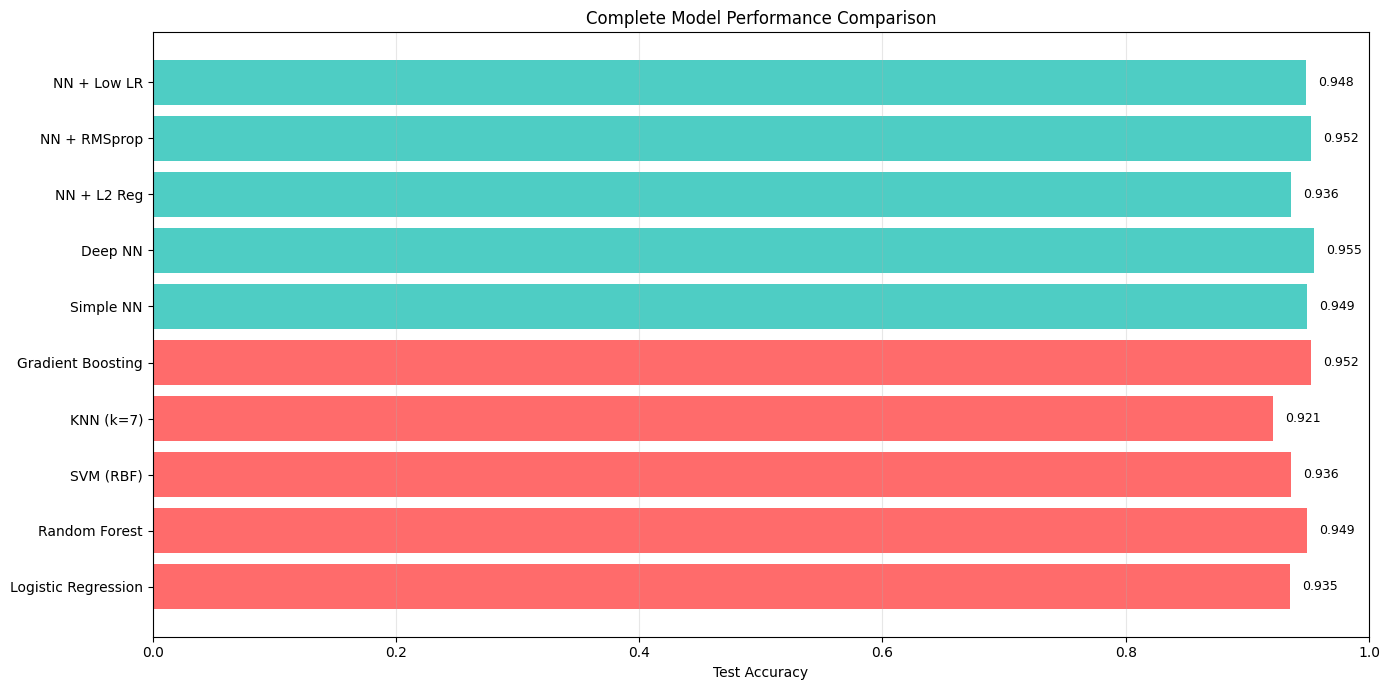


 BEST MODEL: Deep NN
   Test Accuracy: 0.9547
   Type: Deep Learning


In [20]:
# Combine all results
all_results = pd.concat([
    ml_df.assign(Type='Traditional ML'),
    dl_df.assign(Type='Deep Learning')
], ignore_index=True)

print("\n=== COMPLETE RESULTS TABLE ===")
print(all_results.to_string(index=False))

# Save to CSV for report
all_results.to_csv('experiment_results.csv', index=False)
print("\n Results saved to 'experiment_results.csv'")

# Final comparison visualization
plt.figure(figsize=(14, 7))
colors = ['#FF6B6B' if t == 'Traditional ML' else '#4ECDC4' for t in all_results['Type']]
plt.barh(all_results['Model'], all_results['Test Acc'], color=colors)
plt.xlabel('Test Accuracy')
plt.title('Complete Model Performance Comparison')
plt.xlim([0, 1])
plt.grid(axis='x', alpha=0.3)
for idx, (model, acc) in enumerate(zip(all_results['Model'], all_results['Test Acc'])):
    plt.text(acc + 0.01, idx, f'{acc:.3f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

# Best model summary
best_idx = all_results['Test Acc'].idxmax()
print(f"\n BEST MODEL: {all_results.iloc[best_idx]['Model']}")
print(f"   Test Accuracy: {all_results.iloc[best_idx]['Test Acc']:.4f}")
print(f"   Type: {all_results.iloc[best_idx]['Type']}")

